In [21]:
import sqlite3
import pandas as pd
con = sqlite3.connect('contrcalc.db') 
price_df = pd.read_sql('Select * FROM price_table', con, index_col='price_id')

from datetime import datetime

In [27]:
price_df['date_fullfillment'][1].to_datetime

AttributeError: 'str' object has no attribute 'to_datetime'

In [22]:
price_df[price_df['commodity_id']==2 & price_df['date_fullfillment']>datetime(2023, 1, 1)]['date_fullfillment']

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

In [32]:
price_df['date_fullfillment'].isin(['2022-11-23 00:00:00', '2022-05-23 00:00:00'])

price_id
1      True
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19    False
20    False
Name: date_fullfillment, dtype: bool

In [35]:
# Using graph_objects
import plotly.graph_objects as go
import plotly.express as px

import pandas as pd


fig = go.Figure([px.line(x=price_df[price_df['date_fullfillment'].isin(['2022-11-23 00:00:00', '2022-05-23 00:00:00'])]['date_price'], y=price_df['price'], color='date_fullfillment')])
fig.show()

ValueError: All arguments should have the same length. The length of argument `y` is 20, whereas the length of  previously-processed arguments ['x'] is 4

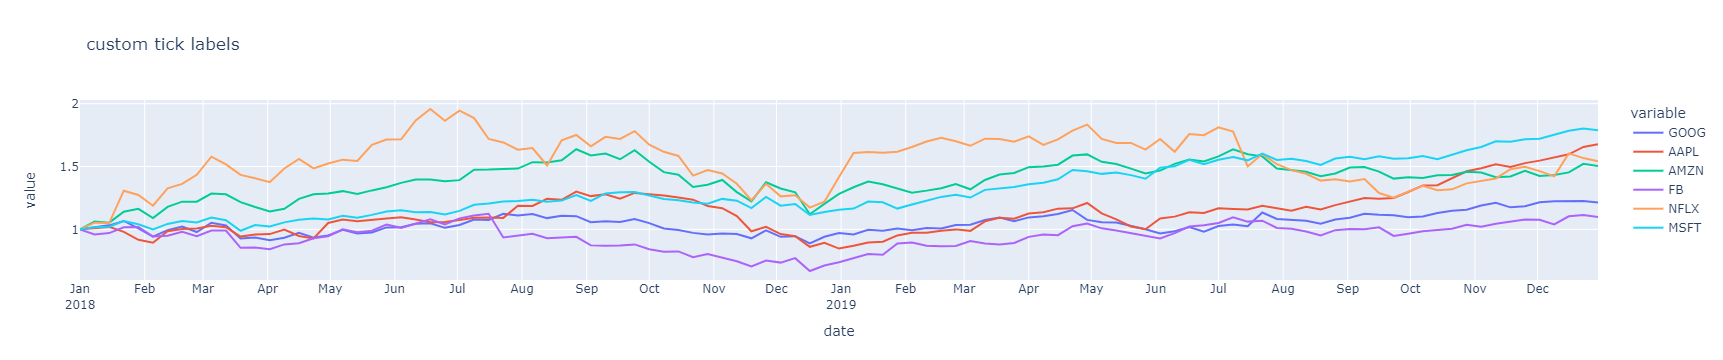

           date      GOOG      AAPL      AMZN        FB      NFLX      MSFT
0    2018-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
1    2018-01-08  1.018172  1.011943  1.061881  0.959968  1.053526  1.015988
2    2018-01-15  1.032008  1.019771  1.053240  0.970243  1.049860  1.020524
3    2018-01-22  1.066783  0.980057  1.140676  1.016858  1.307681  1.066561
4    2018-01-29  1.008773  0.917143  1.163374  1.018357  1.273537  1.040708
..          ...       ...       ...       ...       ...       ...       ...
100  2019-12-02  1.216280  1.546914  1.425061  1.075997  1.463641  1.720717
101  2019-12-09  1.222821  1.572286  1.432660  1.038855  1.421496  1.752239
102  2019-12-16  1.224418  1.596800  1.453455  1.104094  1.604362  1.784896
103  2019-12-23  1.226504  1.656000  1.521226  1.113728  1.567170  1.802472
104  2019-12-30  1.213014  1.678000  1.503360  1.098475  1.540883  1.788185

[105 rows x 7 columns]


In [37]:
import plotly.express as px
df = px.data.stocks()
fig = px.line(df, x="date", y=df.columns,
              hover_data={"date": "|%B %d, %Y"},
              title='custom tick labels')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()
print(df)